In [1]:
# Importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter
from sklearn.preprocessing import StandardScaler # data normalization
from imblearn.over_sampling import SMOTE
from numpy import where
import itertools # construct specialized tools
from matplotlib import rcParams # plot size customization
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
!pip install imbalanced-learn

In [3]:
# Check version number
import imblearn
from imblearn.over_sampling import RandomOverSampler
print(imblearn.__version__)

0.10.1


#Load Data

In [4]:
dataset = '/content/dataset.csv'
dataset = pd.read_csv(dataset)
dataset.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


#Normalization

In [5]:
dataset = dataset.drop(columns=['Nacionality','International'], axis=1)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 33 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Mother's qualification                          4424 non-null   int64  
 7   Father's qualification                          4424 non-null   int64  
 8   Mother's occupation                             4424 non-null   int64  
 9   Father's occupation                      

In [6]:
features = dataset.columns.drop('Target')
features

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance', 'Previous qualification',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Displaced',
       'Educational special needs', 'Debtor', 'Tuition fees up to date',
       'Gender', 'Scholarship holder', 'Age at enrollment',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)', 'Unemployment rate',
       '

In [7]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
dataset[features] = scaler.fit_transform(dataset[features])

In [8]:
dataset.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,0.0,0.411765,0.555556,0.0625,1.0,0.0,0.428571,0.272727,0.161290,0.200000,...,0.0,0.00000,0.000000,0.00,0.000000,0.0,0.372093,0.488889,0.766182,Dropout
1,0.0,0.294118,0.111111,0.6250,1.0,0.0,0.000000,0.060606,0.096774,0.066667,...,0.0,0.26087,0.181818,0.30,0.735897,0.0,0.732558,0.111111,0.640687,Graduate
2,0.0,0.000000,0.555556,0.2500,1.0,0.0,0.750000,0.787879,0.290323,0.200000,...,0.0,0.26087,0.000000,0.00,0.000000,0.0,0.372093,0.488889,0.766182,Dropout
3,0.0,0.411765,0.222222,0.8750,1.0,0.0,0.785714,0.787879,0.161290,0.066667,...,0.0,0.26087,0.303030,0.25,0.667692,0.0,0.209302,0.000000,0.124174,Graduate
4,0.2,0.647059,0.111111,0.1250,0.0,0.0,0.750000,0.818182,0.290323,0.200000,...,0.0,0.26087,0.181818,0.30,0.700000,0.0,0.732558,0.111111,0.640687,Graduate


#Encoding

In [9]:
unique_label = dataset['Target'].unique()
print(unique_label)

['Dropout' 'Graduate' 'Enrolled']


In [10]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
dataset['Target'] = label_encoder.fit_transform(dataset['Target'])
print(dataset['Target'])

0       0
1       2
2       0
3       2
4       2
       ..
4419    2
4420    0
4421    0
4422    2
4423    2
Name: Target, Length: 4424, dtype: int64


In [11]:
X = dataset[features]
Y = dataset.drop(features, axis=1)['Target']

print(X.shape, Y.shape)

(4424, 32) (4424,)


#Data Imbalence

In [12]:
from imblearn.over_sampling import SMOTE
from collections import Counter

sm = SMOTE(random_state=42)
X_resampled, Y_resampled = sm.fit_resample(X, Y)
print(f'Resampled dataset shape {Counter(Y_resampled)}')

Resampled dataset shape Counter({0: 2209, 2: 2209, 1: 2209})


#Train

##Default

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, Y_resampled, test_size = 0.2, random_state = 42)

In [20]:
# Modelling
from sklearn.svm import SVC
# svclassifier = SVC(C=1.0, kernel='linear', degree=3, gamma='auto',probability=True)
svclassifier = SVC()
svclassifier.fit(X_train, y_train)

SVC()

In [21]:
# Predictions
yhat = svclassifier.predict(X_test)

In [22]:
# Classificaton report
from sklearn.metrics import classification_report
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.85      0.72      0.78       444
           1       0.67      0.71      0.69       439
           2       0.73      0.80      0.76       443

    accuracy                           0.74      1326
   macro avg       0.75      0.74      0.74      1326
weighted avg       0.75      0.74      0.74      1326



In [23]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
default=list()
print("Accuracy: %.4f" % accuracy_score(y_test, yhat))
default.append(accuracy_score(y_test, yhat))
print('Precision: %.4f' % precision_score(y_test, yhat, average='macro'))
default.append(precision_score(y_test, yhat, average='macro'))
print("Recall: %.4f" % recall_score(y_test, yhat, average='macro'))
default.append(recall_score(y_test, yhat, average='macro'))
print("F1-score: %.4f" % f1_score(y_test, yhat, average='macro'))
default.append(f1_score(y_test, yhat, average='macro'))

Accuracy: 0.7421
Precision: 0.7490
Recall: 0.7420
F1-score: 0.7430


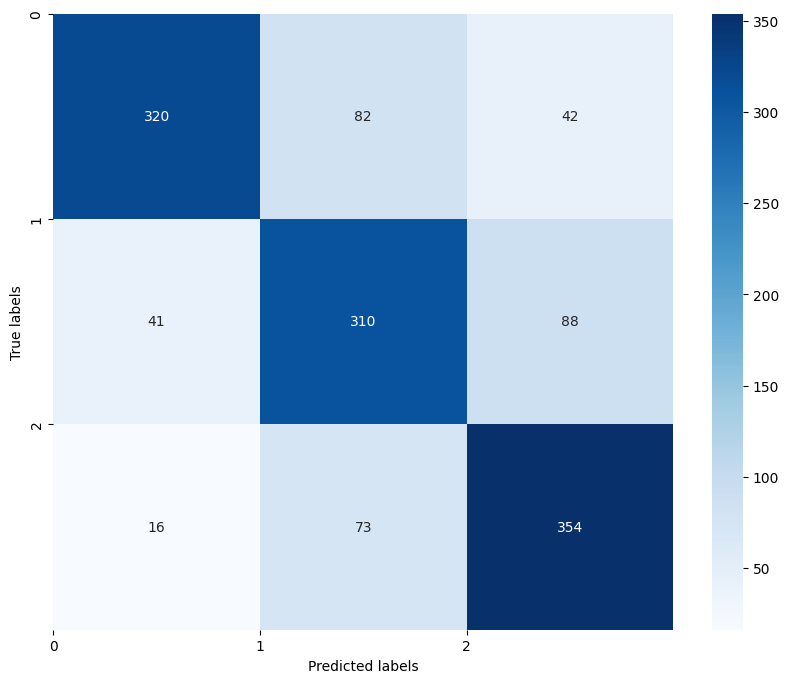

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
# Lấy danh sách các nhãn từ dữ liệu thực tế
labels = list(set(y_test))

# Tính Confusion Matrix
cm = confusion_matrix(y_test, yhat, labels=labels)

# Biểu diễn Confusion Matrix bằng heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')

# Đặt tên cho các trục
plt.xlabel('Predicted labels')
plt.ylabel('True labels')

# Đặt tên cho các nhãn trục x và trục y
x_labels = labels  # Các nhãn của trục x (dự đoán)
y_labels = labels  # Các nhãn của trục y (thực tế)
plt.xticks(np.arange(len(x_labels)), x_labels)
plt.yticks(np.arange(len(y_labels)), y_labels)

# Hiển thị biểu đồ
plt.show()


##Tune

In [14]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Define the parameter grid
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001]}

# Create SVC classifier
svc = SVC()

# Create GridSearchCV object
grid_search = GridSearchCV(svc, param_grid, cv=5)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Print the best parameters and best score
print("Best Parameters:", best_params)
print("Best Score:", best_score)


Best Parameters: {'C': 10, 'gamma': 1, 'kernel': 'rbf'}
Best Score: 0.8355051304394218


In [25]:
# Predictions
yhat = grid_search.predict(X_test)

In [26]:
# Classificaton report
from sklearn.metrics import classification_report
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.90      0.85      0.88       444
           1       0.83      0.91      0.87       439
           2       0.85      0.82      0.83       443

    accuracy                           0.86      1326
   macro avg       0.86      0.86      0.86      1326
weighted avg       0.86      0.86      0.86      1326



In [27]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
tuned=list()
print("Accuracy: %.4f" % accuracy_score(y_test, yhat))
tuned.append(accuracy_score(y_test, yhat))
print('Precision: %.4f' % precision_score(y_test, yhat, average='macro'))
tuned.append(precision_score(y_test, yhat, average='macro'))
print("Recall: %.4f" % recall_score(y_test, yhat, average='macro'))
tuned.append(recall_score(y_test, yhat, average='macro'))
print("F1-score: %.4f" % f1_score(y_test, yhat, average='macro'))
tuned.append(f1_score(y_test, yhat, average='macro'))

Accuracy: 0.8590
Precision: 0.8602
Recall: 0.8591
F1-score: 0.8588


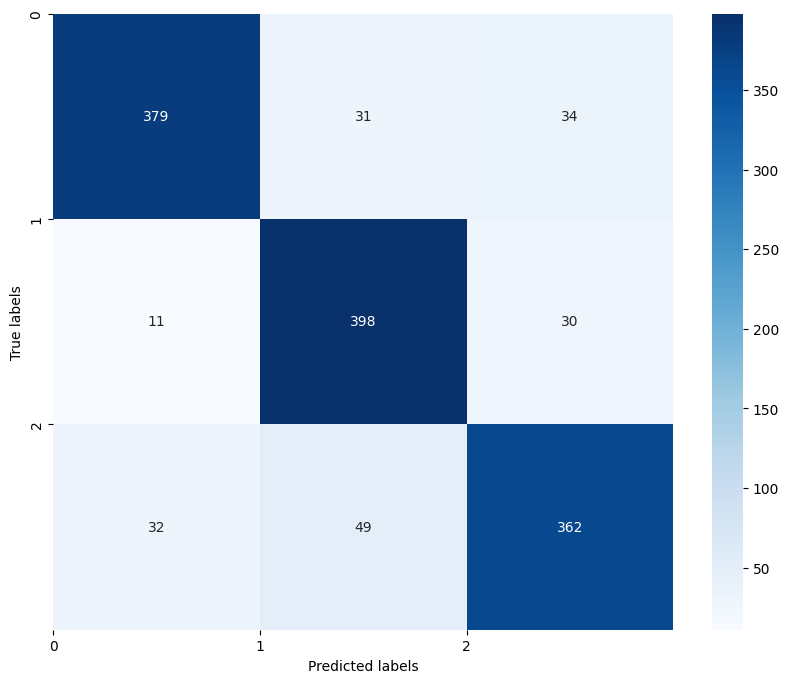

In [28]:
labels = list(set(y_test))

# Tính Confusion Matrix
cm = confusion_matrix(y_test, yhat, labels=labels)

# Biểu diễn Confusion Matrix bằng heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')

# Đặt tên cho các trục
plt.xlabel('Predicted labels')
plt.ylabel('True labels')

# Đặt tên cho các nhãn trục x và trục y
x_labels = labels  # Các nhãn của trục x (dự đoán)
y_labels = labels  # Các nhãn của trục y (thực tế)
plt.xticks(np.arange(len(x_labels)), x_labels)
plt.yticks(np.arange(len(y_labels)), y_labels)

# Hiển thị biểu đồ
plt.show()

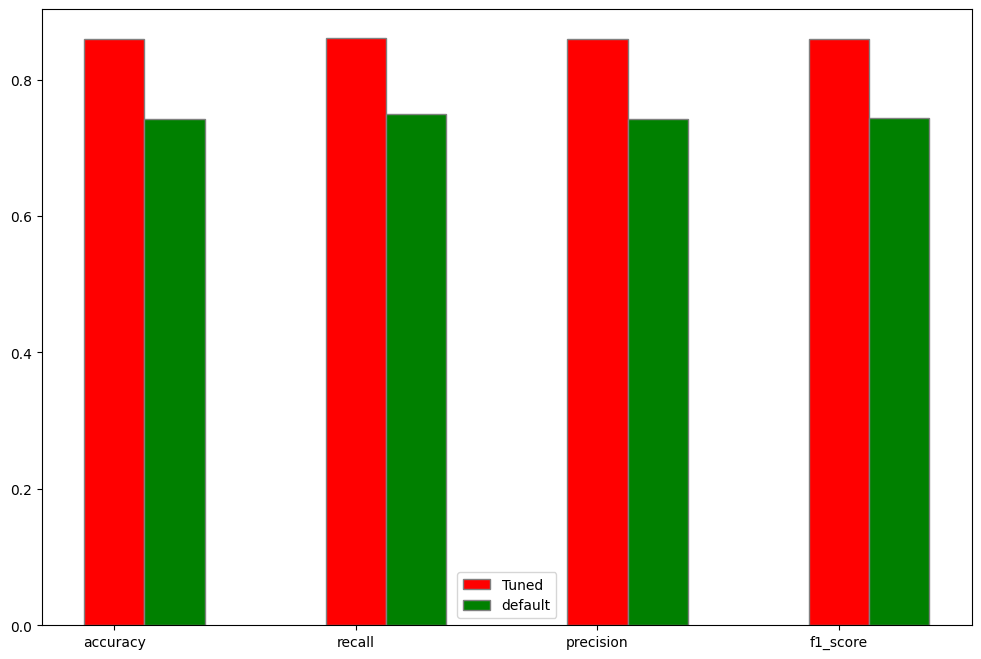

In [29]:
# set width of bar
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8))

# Set position of bar on X axis
br1 = np.arange(len(tuned))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]

# Make the plot
plt.bar(br2, tuned, color ='r', width = barWidth,
        edgecolor ='grey', label ='Tuned')
plt.bar(br3, default, color ='g', width = barWidth,
        edgecolor ='grey', label ='default')
#plt.bar(br3, CSE, color ='b', width = barWidth,
        #edgecolor ='grey', label ='CSE')

# Adding Xticks
plt.xlabel('', fontweight ='bold', fontsize = 15)
plt.ylabel('', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(tuned))],['accuracy', 'recall', 'precision', 'f1_score'])

plt.legend()
plt.show()